
# Lab 5

In [1]:

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


## Load Data

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data(path='/gpfs/projects/nct00/nct00002/basics-utils/mnist.npz')

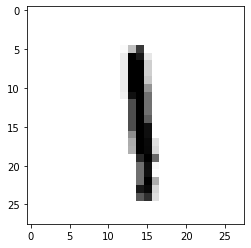

In [3]:
import matplotlib.pyplot as plt
plt.imshow(x_train[8], cmap=plt.cm.binary)



In [4]:
print(y_train[8])

1


In [5]:
print(x_train.ndim)

3


In [6]:
print(x_train.shape)

(60000, 28, 28)


In [7]:
print(x_train.dtype) 

uint8


## Prepare data

In [8]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

In [9]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [10]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [11]:
from tensorflow.keras.utils import to_categorical


In [12]:
print(y_test[0])

7


In [13]:
print(y_train[0])

5


In [14]:
print(y_train.shape)

(60000,)


In [15]:
print(x_test.shape)

(10000, 784)


In [16]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


print(y_test[0])


[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [17]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [18]:
print(y_train.shape)

(60000, 10)


In [19]:
print(y_test.shape)

(10000, 10)


## Define Model

In [20]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(10, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


## Compile model (configuration)

In [22]:
model.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics = ['accuracy'])


## Training the model

In [23]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 1.8711 - accuracy: 0.5402
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 1.2567 - accuracy: 0.7388
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.9505 - accuracy: 0.8000
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7890 - accuracy: 0.8285
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6896 - accuracy: 0.8443


## Evaluation the model

In [24]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.6435 - accuracy: 0.8581


In [25]:
print('Test accuracy:', test_acc)

Test accuracy: 0.8580999970436096


In [26]:
# Look at confusion matrix 
#Note, this code is taken straight from the SKLEARN website, an nice way of viewing confusion matrix.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

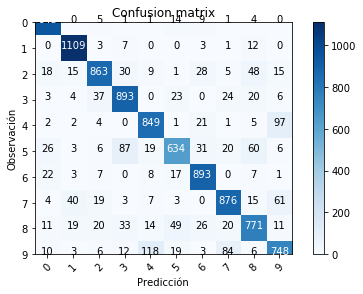

In [27]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools

# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

## Use the model 

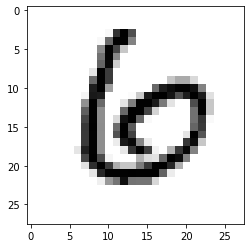

In [28]:
x_test_old = x_test.reshape(10000, 28,28)
plt.imshow(x_test_old[11], cmap=plt.cm.binary)

In [29]:
predictions = model.predict(x_test)

In [30]:
np.argmax(predictions[11])

6

In [31]:
print(predictions[11])

[0.07969235 0.02306989 0.29936725 0.02052284 0.04566504 0.07926913
 0.3557959  0.00120987 0.08391185 0.01149597]


In [32]:
np.sum(predictions[11])

1.0000001

# Your turn ( and create the report)

* Start from scratch, including all imports and initializations
* Create a better model
* Print the confusion matrix
* Explain the improvement applied: more epochs? new optimizer? more layers? more number of neurons per layer?